In [1]:
#Import neccessary libaries 
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset which has dates, devices and it metrics and whether is failure or Not failure
dataset = pd.read_csv(r"predictive_maintenance_dataset.csv")
dataset

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
#checking if any null values present in the dataset 
dataset.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [7]:
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day
df = dataset.drop(['date', 'device'], axis=1)
df

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,year,month,day
0,0,215630672,55,0,52,6,407438,0,0,7,2015,1,1
1,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,8,0,2015,11,2
124490,0,172556680,96,107,4,11,332792,0,0,13,2015,11,2
124491,0,19029120,4832,0,0,11,350410,0,0,0,2015,11,2
124492,0,226953408,0,0,0,12,358980,0,0,0,2015,11,2


In [8]:
# Apparently the data is highly imbalanced 
df["failure"].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [9]:
df.columns

Index(['failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric8', 'metric9', 'year', 'month', 'day'],
      dtype='object')

In [10]:
df

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,year,month,day
0,0,215630672,55,0,52,6,407438,0,0,7,2015,1,1
1,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,8,0,2015,11,2
124490,0,172556680,96,107,4,11,332792,0,0,13,2015,11,2
124491,0,19029120,4832,0,0,11,350410,0,0,0,2015,11,2
124492,0,226953408,0,0,0,12,358980,0,0,0,2015,11,2


In [11]:
# Since the data is so imbalanced, hence applying Over sampling and undersampling technique
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Indep_var = df.drop('failure', axis=1)
dep_var = df['failure']

# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(Indep_var, dep_var )

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(Indep_var , dep_var )

# Display the new class distributions
print("Class distribution after oversampling:")
print(y_resampled_over.value_counts())
print("\nClass distribution after undersampling:")
print(y_resampled_under.value_counts())

Class distribution after oversampling:
failure
0    124388
1    124388
Name: count, dtype: int64

Class distribution after undersampling:
failure
0    106
1    106
Name: count, dtype: int64


In [12]:
#from imblearn.combine import SMOTETomek

#smt = SMOTETomek(random_state=42)
#X_resampled_combined, y_resampled_combined = smt.fit_resample(Indep_var, dep_var)

# Display the new class distribution
#y_resampled_combined.value_counts()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled_under, y_resampled_under, test_size=0.3,random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_logreg = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2'],
    'C': [10, 100, 1000, 2000, 3000]
}

param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

param_grid_RF = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [10, 100]
}

# Create GridSearchCV for Logistic Regression
grid_logreg = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid_logreg,
                           refit=True,
                           verbose=3,
                           n_jobs=-1,
                           scoring='f1_weighted')

# Create GridSearchCV for Decision Tree
grid_DT = GridSearchCV(estimator=DecisionTreeClassifier(),
                       param_grid=param_grid_DT,
                       refit=True,
                       verbose=3,
                       n_jobs=-1,
                       scoring='f1_weighted')

# Create GridSearchCV for Random Forest
grid_RF = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=param_grid_RF,
                       refit=True,
                       verbose=3,
                       n_jobs=-1,
                       scoring='f1_weighted')

# Fit the models for grid search
grid_logreg.fit(X_train, Y_train)
grid_DT.fit(X_train, Y_train)
grid_RF.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1_weighted', verbose=3)

In [15]:
grid_predictions = grid_logreg.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matrics for Log reg\n", cm,'\n')
print("Classification report for Log reg\n", cl_rep)

Confusion Matrics for Log reg
 [[28  3]
 [16 17]] 

Classification report for Log reg
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        31
           1       0.85      0.52      0.64        33

    accuracy                           0.70        64
   macro avg       0.74      0.71      0.69        64
weighted avg       0.75      0.70      0.69        64



In [16]:
grid_predictions = grid_RF.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matrisc for Random Forest\n", cm,'\n')
print("Classification report for Random Forest\n", cl_rep)

Confusion Matrisc for Random Forest
 [[25  6]
 [11 22]] 

Classification report for Random Forest
               precision    recall  f1-score   support

           0       0.69      0.81      0.75        31
           1       0.79      0.67      0.72        33

    accuracy                           0.73        64
   macro avg       0.74      0.74      0.73        64
weighted avg       0.74      0.73      0.73        64



In [17]:
grid_predictions = grid_DT.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test,grid_predictions)
cl_rep = classification_report(Y_test,grid_predictions)
print("Confusion Matric for Decision Tree\n", cm,'\n')
print("Classification report for Decision Tree\n", cl_rep)

Confusion Matric for Decision Tree
 [[22  9]
 [13 20]] 

Classification report for Decision Tree
               precision    recall  f1-score   support

           0       0.63      0.71      0.67        31
           1       0.69      0.61      0.65        33

    accuracy                           0.66        64
   macro avg       0.66      0.66      0.66        64
weighted avg       0.66      0.66      0.66        64



ROC-AUC Score: 0.7272727272727273


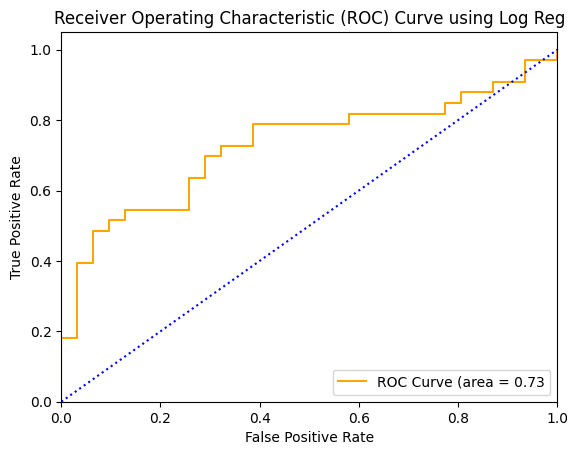

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_logreg.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_logreg.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Log Reg')
plt.legend(loc="lower right")
plt.show()

ROC-AUC Score: 0.6578690127077225


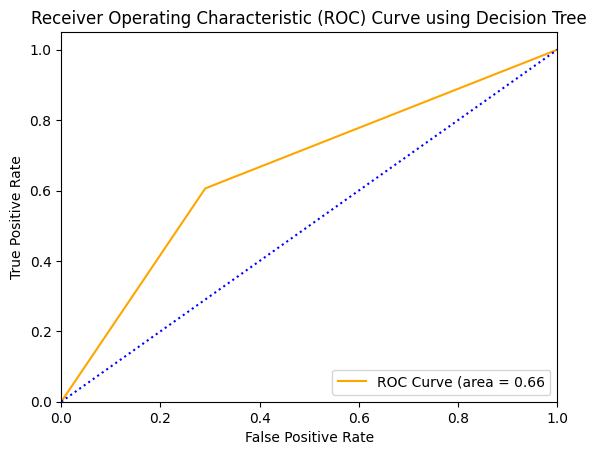

In [19]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_DT.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_DT.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Decision Tree')
plt.legend(loc="lower right")
plt.show()

ROC-AUC Score: 0.7605083088954058


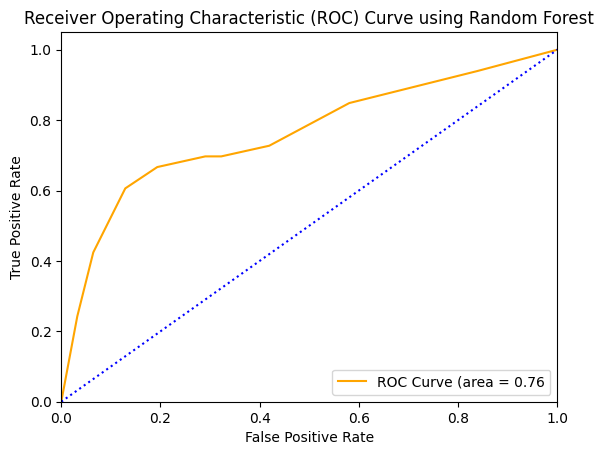

In [20]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc = roc_auc_score(Y_test,grid_RF.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)
tpr,fpr,_ = roc_curve(Y_test,grid_RF.predict_proba(X_test)[:,1])
auc = auc(tpr,fpr)
plt.figure
plt.plot(tpr,fpr,color='orange', label="ROC Curve (area = {:.2f}".format(auc))
plt.plot([0,1],[0,1],color ='blue',linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using Random Forest')
plt.legend(loc="lower right")
plt.show()

In [21]:
re = grid_logreg.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.108988,0.002411,0.006275,0.000454,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.682726,0.583333,0.722222,0.593352,0.782132,0.672753,0.075909,2
1,0.010584,0.002047,0.005277,0.000706,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.450549,0.345315,0.554286,0.497278,0.352665,0.440018,0.081297,11
2,0.006887,0.000882,0.006745,0.001097,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.450549,0.450549,0.712919,0.497278,0.497278,0.521715,0.097859,6
3,0.015651,0.001869,0.006865,0.000806,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.333333,0.333333,0.333333,0.352665,0.352665,0.341066,0.009470,16
4,0.107008,0.007386,0.005275,0.001452,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.682726,0.583333,0.722222,0.593352,0.782132,0.672753,0.075909,2
5,0.010772,0.003673,0.005223,0.000967,100,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.450549,0.345315,0.554286,0.497278,0.352665,0.440018,0.081297,11
6,0.005627,0.000657,0.006173,0.001213,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.450549,0.450549,0.712919,0.497278,0.497278,0.521715,0.097859,6
7,0.009583,0.001138,0.006149,0.001206,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.333333,0.333333,0.333333,0.352665,0.352665,0.341066,0.009470,16
8,0.108047,0.004789,0.005123,0.000394,1000,l2,newton-cg,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton...",0.682726,0.583333,0.722222,0.593352,0.782132,0.672753,0.075909,2
9,0.009480,0.002140,0.004847,0.000302,1000,l2,lbfgs,"{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}",0.450549,0.345315,0.554286,0.497278,0.352665,0.440018,0.081297,11


In [22]:
re = grid_RF.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001903,0.000325,0.000000,0.000000,gini,auto,10,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.001694,0.000950,0.000000,0.000000,gini,auto,100,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.027958,0.003668,0.005766,0.001804,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.799107,0.796380,0.796380,0.717377,0.825078,0.786864,0.036386,7
3,0.252711,0.012836,0.032981,0.014165,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.799107,0.764310,0.800000,0.827174,0.895047,0.817128,0.043773,4
4,0.025508,0.004444,0.008198,0.004162,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.728507,0.764310,0.728507,0.724138,0.758621,0.740816,0.017030,8
5,0.321419,0.029317,0.020449,0.003705,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",0.799107,0.831650,0.800000,0.827174,0.895047,0.830596,0.034913,2
6,0.002510,0.001829,0.000000,0.000000,entropy,auto,10,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.001829,0.000416,0.000000,0.000000,entropy,auto,100,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.035335,0.015006,0.018010,0.015135,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.866667,0.864253,0.800000,0.827174,0.930537,0.857726,0.044022,1
9,0.278116,0.029605,0.017088,0.002189,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.799107,0.799107,0.800000,0.791611,0.861074,0.810180,0.025628,5


In [23]:
re = grid_DT.cv_results_
result = pd.DataFrame.from_dict(re)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002729,0.000740,0.000000,0.000000,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.001887,0.000582,0.000000,0.000000,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.004716,0.000611,0.005313,0.000324,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.666667,0.733333,0.766407,0.793103,0.756890,0.743280,0.042828,1
3,0.004707,0.000590,0.004697,0.001086,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.699666,0.760000,0.598214,0.412392,0.792611,0.652577,0.137121,8
4,0.005387,0.000716,0.006310,0.001453,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.933036,0.733333,0.732143,0.655172,0.652686,0.741274,0.102157,3
5,0.005213,0.000793,0.005591,0.000536,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.666667,0.722222,0.764310,0.717377,0.551724,0.684460,0.073241,6
6,0.002409,0.000455,0.000000,0.000000,entropy,auto,best,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.001797,0.000399,0.000000,0.000000,entropy,auto,random,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.005707,0.001781,0.005404,0.000567,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.600000,0.766407,0.732143,0.722149,0.791611,0.722462,0.066036,4
9,0.006406,0.001727,0.005014,0.000847,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.733333,0.666667,0.699666,0.619783,0.576065,0.659103,0.055954,7
